# Homework 1

Solves a predator-prey model for phytoplankton and zooplankton, and a density dependent self consumption term is added to the Z equation
(i.e. zooplankton prey on each other also):

 $$ \frac{dP}{dt} = b*P-k_{1}*P*Z $$
 $$ \frac{dZ}{dt} = k_{2}*P*Z-m*Z-k_{3}*Z^{2} $$

  where: $P$ = phytoplankton population
         $Z$ = zooplankton population
         $b$ = (birth-mortality) rate of phytoplankton
         $m$ = mortality rate of zooplankton
         $k_1$ = constant, grazing rate
         $k_2$ = constant, rate of grazed P converted into Z (secondary production)
         $k_3$ = carnivorous consumption of Z by Z

The following code is adapted from Miller (2004)
"Biological Oceanography", page 71.

Parameters (based on Miller, page 72, equations (3) and (4))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
k1 = 0.1 # per day
k2 = 0.01 # per day
k3 = 0 # per day
b = 1.0 # per day
m = 0.5 # per day
dt = 0.1 # days

# Initial conditions
P0 = 80  # phytoplankton
Z0 = 10  # zooplankton

# Compute the fixed point
#Zfixed = b / K1
#Pfixed = d / K2 + K3 * Zfixed / K2

# Set population maximum for termination
#Pmax = 100 * Pfixed
#Zmax = 100 * Zfixed

# Time and average initialization
T = 0
Pave = 0
Zave = 0

In [3]:
nstep = 3000

# Arrays to store time series
SP = np.zeros(nstep)
SZ = np.zeros(nstep)

# Timestep loop
for ntime in range(nstep):
    T += dt

    DP = (b*P - k1*P*Z)*dt
    DZ = (k2*P*Z - m*Z - k3*Z**2)*dt

    P += DP # Note this is Python shorthand for P = P + DP
    Z += DZ

    # Check for extinction
    if P < 1:
        P = 1
    if Z < 1:
        Z = 1

    # Check for population explosion
    # if P > Pmax:
    #     print('P population explosion')
    #     break
    # if Z > Zmax:
    #     print('Z population explosion')
    #     break

    # Accumulate for average
    Pave += P
    Zave += Z

    # Store for plotting
    SP[ntime] = P
    SZ[ntime] = Z

# Compute averages
Pave /= nstep
Zave /= nstep

print('Time averaged P:', Pave)
print('Time averaged Z:', Zave)

Time averaged P: 60.008614427065815
Time averaged Z: 10.008421931738246


Text(0.5, 1.0, 'Phase Space Plot')

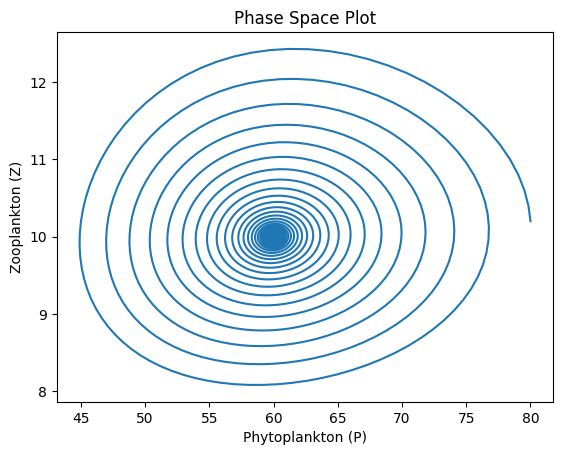

In [4]:
# Plot phase space
plt.figure()
plt.plot(SP[:ntime], SZ[:ntime])
plt.xlabel('Phytoplankton (P)')
plt.ylabel('Zooplankton (Z)')
plt.title('Phase Space Plot')

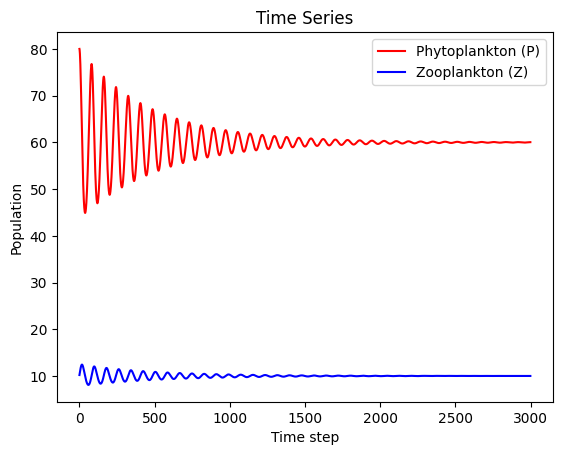

In [5]:
# Plot time series
plt.figure()
plt.plot(SP[:ntime], 'r', label='Phytoplankton (P)')
plt.plot(SZ[:ntime], 'b', label='Zooplankton (Z)')
plt.xlabel('Time step')
plt.ylabel('Population')
plt.title('Time Series')
plt.legend()
plt.show()